<a href="https://colab.research.google.com/github/1e16miin/project1/blob/main/session1_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datset load & Preprocessing 

In [88]:
import pandas as pd
import numpy as np


df = pd.read_csv("vgames2.csv", na_values=["N/A", "Unknown", "Misc"])
df = df.drop(["Unnamed: 0"], axis = 1)

In [89]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,NaN,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [90]:
for col in df.columns:
  print(col, df[col].isnull().sum())

Name 0
Platform 0
Year 271
Genre 1784
Publisher 261
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0


Year와 Genre, Publisher 에서만 na_value가 존재

In [91]:
def preprocess_name(name):
  idx = name.find('(')
  if idx != -1 and "Remake" not in name:
    name = name[:idx]
  return name

In [92]:
df.Name = df.Name.apply(preprocess_name)

이름 전처리
괄호가 있는 것 (ex. JP Sales 등을 하나로 통합) (Remake)는 게임 업계에서 다른 게임으로 분류하므로 예외 처리함.

In [93]:
name_genre = df[["Name", "Genre"]].dropna()
name_year = df[["Name", "Year"]].dropna()
name_publisher = df[["Name", "Publisher"]].dropna()

In [94]:
genres = {name: genre for name, genre in zip(name_genre.Name, name_genre.Genre)}
years = {name: year for name, year in zip(name_year.Name, name_year.Year)}
publishers = {name: publisher for name, publisher in zip(name_publisher.Name, name_publisher.Publisher)}

동일 이름의 게임을 통한 결측치 채우기
1. 결측치를 제거한 dataset을 하나 생성
2. 새로 만들어진 dataset 기준으로 각각의 게임과 대응되는 장르, 연도, 회사를 저장
3. 원래 dataset에서 결측치를 발견하였을 때, 2에서 저장된 게임이라면 대응되는 값으로 결측치를 매꿈
3-1. 만약 저장된 게임이 아니라면 장르는 Misc, 회사는 Unknown으로 결측치를 채움.

In [95]:
for i in range(len(df)):
  try:
    if pd.isna(df.Genre[i]):
      df.Genre[i] = genres[df.Name[i]]
  except:
    df.Genre[i] = "Misc"

for i in range(len(df)):
  try:
    if pd.isna(df.Year[i]):
      df.Year[i] = years[df.Name[i]]
  except:
    df.Year[i] = np.nan

for i in range(len(df)):
  try:
    if pd.isna(df.Publisher[i]):
      df.Publisher[i] = publishers[df.Name[i]]
  except:
    df.Publisher[i] = "Unknown"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [96]:
for col in df.columns:
  print(col, df[col].isnull().sum())

Name 0
Platform 0
Year 146
Genre 0
Publisher 0
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0


그 결과 연도를 제외하고 나머지 feature의 결측값은 모두 처리됨.

In [97]:
df.loc[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
818,Twisted Metal: Small Brawl,PS,NaN,Action,Unknown,0.1,0.07,0,0.01
...,...,...,...,...,...,...,...,...,...
15805,Dream Dancer,DS,NaN,Misc,Unknown,0.01,0,0,0
15897,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0,0,0
16053,Karate,2600,NaN,Fighting,Ultravision,0.44,0.03,0,0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,Unknown,0,0,0.12,0


In [98]:
def preprocess_sales(numeric):#단위를 모두 K로 변환
  try:
    if numeric.isdigit():
      numeric *= 1e3
    else:
      if "K" in numeric:
        numeric = float(numeric.replace("K", ""))
      else:
        numeric = float(numeric.replace("M", ""))*1e3
    return numeric
  except:
    return 0

In [99]:
def preprocess_year(year):
  try:
    if year < 100:  
      if year <= 21:
        year += 2000
      else:
        year += 1900
    
    return int(year)
  except:
    return np.nan

In [100]:
df.Year = df.Year.apply(preprocess_year)
for sales in df.columns[-4:]:
  df[sales] = df[sales].apply(preprocess_sales)

판매량 단위 통일
1. 판매량 데이터를 보면 숫자로만 이루어진 것이 있고, K($10^3$), M($10^6$)등으로 표기된 것이 있음
2. 전 세계에서 판매량이므로 Default는 M이라고 여기고 전처리함

연도 이상치 전처리
1. 연도 data를 보면 1900년대도 아니고, 2000년 대도 아닌 100 이하의  이상한 값이 섞여있음을 알 수 있음.

2. 세계 최초의 video game이 1940년도 후반에 제작되었고, 현재가 2021년.
따라서 이상치 중 21 이하는 2000을 추가하여 2000년대 작품으로, 21 초과값은 1900년대 작품으로 전처리 함. 연도는 뒤에서 다시 채울 예정.


In [26]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad

In [101]:
from bs4 import BeautifulSoup
from urllib.parse import quote_plus
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [103]:
def fill_year(name):
  try:
    baseUrl = 'https://www.google.com/search?q='
    plusUrl = quote_plus(name)
    url = baseUrl + plusUrl
    driver.get(url)

    html = driver.page_source
    soup = BeautifulSoup(html)
    date = soup.select_one('.Eq0J8.LrzXr.kno-fv').text
    year = date.split(" ")[-1]
    return int(year)
  except:
    return np.nan

In [104]:
df.Year = df[["Name","Year"]].apply(lambda row: fill_year(row[0]) if pd.isna(row[1]) else row[1], axis=1)

크롤링을 통한 연도 전처리


In [105]:
df.loc[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1235,My Healthy Cooking Coach,DS,NaN,Simulation,Unknown,90.0,0.0,0.0,10.0
1301,Move Fitness,PS3,NaN,Sports,Sony Computer Entertainment,0.0,170.0,0.0,50.0
1796,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,Idea Factory,0.0,0.0,10.0,0.0
2062,Shorts,DS,NaN,Platform,Unknown,10.0,0.0,0.0,0.0
2408,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0.0,0.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...
15805,Dream Dancer,DS,NaN,Misc,Unknown,10.0,0.0,0.0,0.0
15897,Virtua Quest,GC,NaN,Role-Playing,Unknown,10.0,0.0,0.0,0.0
16053,Karate,2600,NaN,Fighting,Ultravision,440.0,30.0,0.0,0.0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,Unknown,0.0,0.0,120.0,0.0


In [106]:
year_platform = df[["Year", "Platform"]]

In [107]:
year_platform_crosstab = pd.crosstab(df.Platform, df.Year, dropna=True, margins=True)

In [108]:
year_platform_crosstab

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,All
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118
3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,118,95,91,79,86,35,0,0,507
DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,204,379,495,407,327,155,27,9,1,0,0,0,1,2147
GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,9,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98
GBA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,107,198,150,176,136,40,6,0,0,0,0,0,0,0,0,0,0,0,816
GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,154,149,84,98,41,4,0,0,0,0,0,0,0,0,0,0,0,553
GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27


In [109]:
year_means = []
for row in range(len(year_platform_crosstab)-1):
    year_means.append(np.dot(year_platform_crosstab.iloc[row][:-1], year_platform_crosstab.columns[:-1]))

In [110]:
year_means = round(year_means/year_platform_crosstab.All[:-1])

In [111]:
for i in range(len(df)):
  if pd.isna(df.Year[i]):
    df.Year[i] = year_means[df.Platform[i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
df.Year.isnull().sum()

0

In [44]:
# 
# df.to_csv("myvgames2.csv", index=False)

Q1. 지역에 따라서 선호하는 게임 장르가 다를까?

In [113]:
genre_preference = df[["Genre", "NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]]
groupby_Genre = genre_preference.groupby(["Genre"])

In [114]:
groupby_Genre.sum().T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,873320.0,103660.0,221590.0,416620.0,445530.0,123350.0,354730.0,309540.0,576600.0,182960.0,681350.0,68700.0
EU_Sales,521490.0,62070.0,101320.0,221600.0,201620.0,50730.0,235900.0,181580.0,313270.0,101380.0,376850.0,45320.0
JP_Sales,157900.0,52000.0,87350.0,115930.0,127650.0,53870.0,56400.0,344950.0,37280.0,63700.0,135370.0,49620.0
Other_Sales,185760.0,16810.0,36680.0,78760.0,51540.0,12520.0,77210.0,55960.0,102690.0,31490.0,134970.0,11360.0


In [115]:
from scipy.stats import chisquare, chi2_contingency, chi2
chi2_Q1 = chi2_contingency(groupby_Genre.sum().T, correction=False)
pvalue_Q1 = chi2_Q1[1]

In [116]:
pvalue_Q1

0.0

Q2. 연도별 게임의 트렌드가 있을까?

In [117]:
df["Global_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [118]:
groupby_Year_Genre = df[["Year", "Genre", "Global_Sales"]].groupby(["Year", "Genre"]).sum()
year_trend = groupby_Year_Genre.unstack(level=1).fillna(0)

In [119]:
year_trend

Global_Sales                     ...                              
Genre        Action Adventure Fighting  ... Simulation    Sports Strategy
Year                                    ...                              
1980.0        800.0       0.0    770.0  ...        0.0     500.0      0.0
1981.0      14790.0       0.0      0.0  ...      440.0     780.0      0.0
1982.0       8980.0    1300.0    470.0  ...        0.0    1730.0      0.0
1983.0       2860.0     400.0      0.0  ...        0.0    3200.0      0.0
1984.0       1850.0       0.0      0.0  ...        0.0    6170.0      0.0
1985.0       3520.0       0.0   1050.0  ...       40.0    1960.0      0.0
1986.0      13740.0       0.0      0.0  ...        0.0    5580.0      0.0
1987.0       1110.0    4380.0   5420.0  ...        0.0    3710.0      0.0
1988.0       1740.0       0.0      0.0  ...       30.0    3600.0      0.0
1989.0       4650.0       0.0      0.0  ...        0.0    5720.0      0.0
1990.0       6390.0       0.0      0.0  ...     1130.0    2110.0      0.0
1991.0       6760.0    2240.0    390.0  ...     2150.0    2410.0    940.0
1992.0       3840.0   12240.0  14230.0  ...     2140.0    2950.0    360.0
1993.0       1810.0      70.0   8750.0  ...      190.0    3180.0    810.0
1994.0       1550.0    3740.0   8470.0  ...     2720.0    8410.0   3570.0
1995.0       3580.0     710.0  14840.0  ...     4170.0    7990.0   6540.0
1996.0      18600.0    4180.0  18040.0  ...    11330.0   17420.0   5610.0
1997.0      27590.0    4970.0  11800.0  ...     9640.0   30240.0   7720.0
1998.0      39510.0    8080.0  31680.0  ...     7110.0   43210.0  13490.0
1999.0      28810.0    7610.0  14310.0  ...    11460.0   29210.0  18470.0
2000.0      33980.0    2960.0  20260.0  ...     3370.0   41260.0   8520.0
2001.0      54860.0    9120.0  18100.0  ...    19930.0   52050.0   7540.0
2002.0      87450.0   11070.0  25070.0  ...    10820.0   67230.0   5510.0
2003.0      69590.0    4520.0  23790.0  ...    21210.0   65270.0   8000.0
2004.0      76430.0    8630.0  17340.0  ...    10890.0   63760.0   7140.0
2005.0      86640.0    8530.0  23090.0  ...    38280.0   60890.0   5340.0
2006.0      66960.0   11480.0  22530.0  ...    21980.0  138160.0   4230.0
2007.0     107270.0   22440.0  17630.0  ...    48870.0   98240.0   9490.0
2008.0     143470.0   24030.0  35500.0  ...    46690.0   95910.0  12330.0
2009.0     137840.0   20790.0  32340.0  ...    34010.0  139250.0  12870.0
2010.0     119690.0   16570.0  14880.0  ...    22460.0   93530.0  14000.0
2011.0     122010.0   15910.0  22650.0  ...    15590.0   57710.0   9390.0
2012.0     126840.0    5950.0   9530.0  ...    13370.0   30900.0   3490.0
2013.0     125840.0    6690.0   7230.0  ...     8680.0   41540.0   6320.0
2014.0      99010.0    6090.0  16150.0  ...     5540.0   46640.0    970.0
2015.0      68250.0    8030.0   6780.0  ...     4610.0   41490.0   1830.0
2016.0      19850.0    1810.0   3850.0  ...      390.0   14630.0    520.0
2017.0         10.0       0.0      0.0  ...        0.0       0.0      0.0
2020.0          0.0       0.0      0.0  ...      290.0       0.0      0.0

[39 rows x 12 columns]

In [120]:
chi2_Q2 = chi2_contingency(year_trend, correction=False)
pvalue_Q2 = chi2_Q2[1]

In [121]:
pvalue_Q2

0.0

Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [122]:
top100_global_sales = df.sort_values(["Global_Sales"],ascending=False)[:100]

In [123]:
top100_global_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270.0,8890.0,10220.0,0.0,30380.0
...,...,...,...,...,...,...,...,...,...,...
7494,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5390.0,1180.0,700.0,190.0,7460.0
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240.0,1350.0,2420.0,430.0,7440.0
10937,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790.0,1900.0,0.0,690.0,7380.0
8010,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4460.0,2130.0,60.0,690.0,7340.0


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

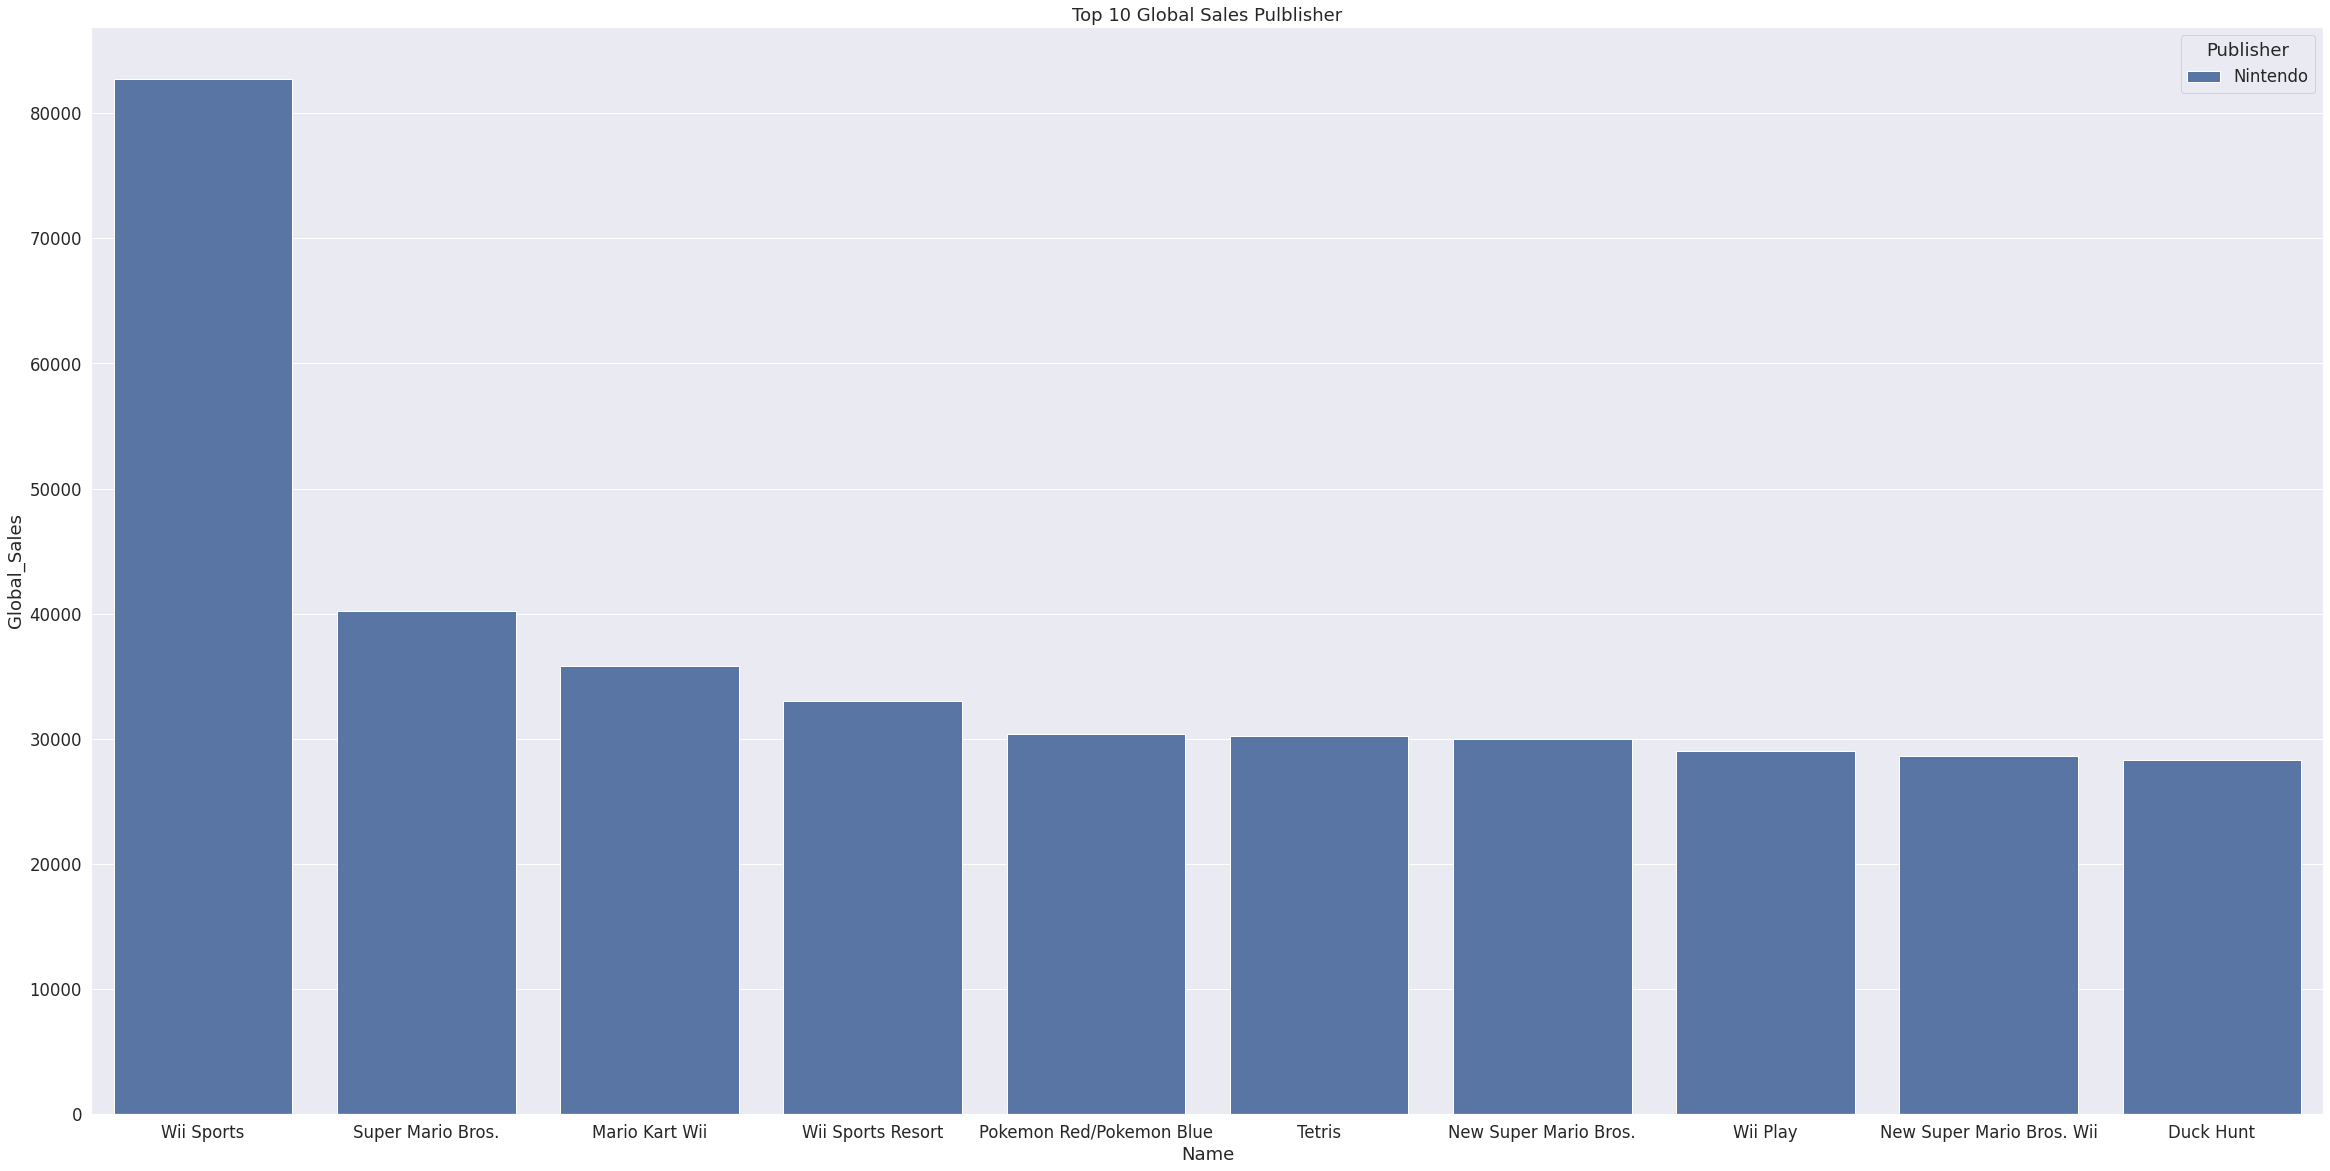

In [125]:
top10_global_sales = top100_global_sales[:10]
# plt.rc('font', size=20)
plt.figure(figsize=(40, 20))
sns.set(font_scale = 1.5)
sns.barplot(data = top10_global_sales, x="Name", y="Global_Sales", hue="Publisher", dodge=False)
plt.title("Top 10 Global Sales Pulblisher")
plt.show()

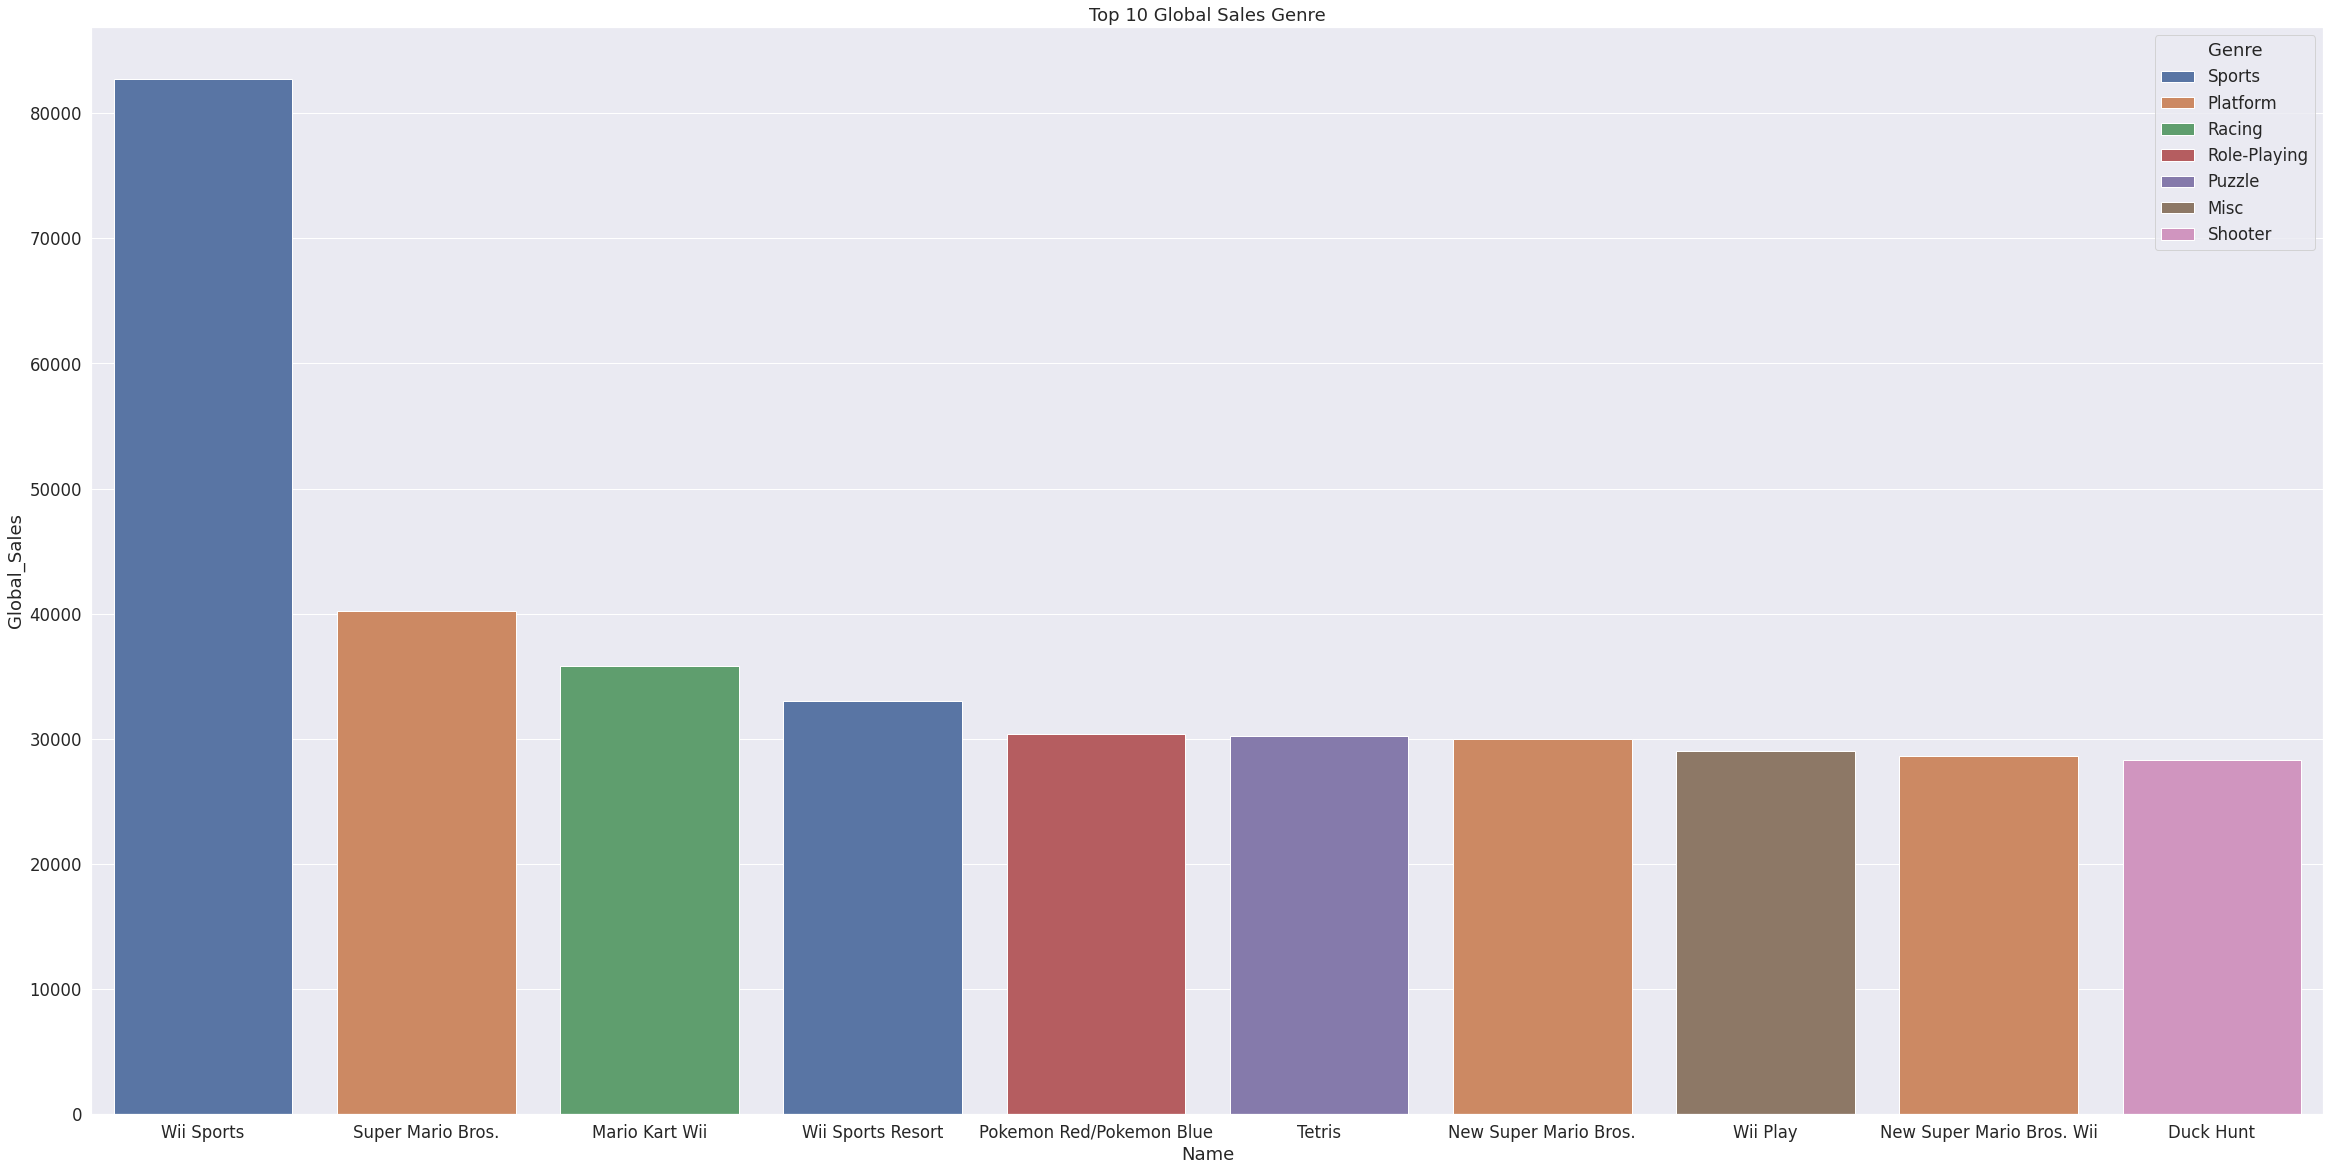

In [126]:
plt.figure(figsize=(40, 20))
sns.set(font_scale = 1.5)
sns.barplot(data = top10_global_sales, x="Name", y="Global_Sales", hue="Genre", dodge=False)

plt.title("Top 10 Global Sales Genre")
plt.show()

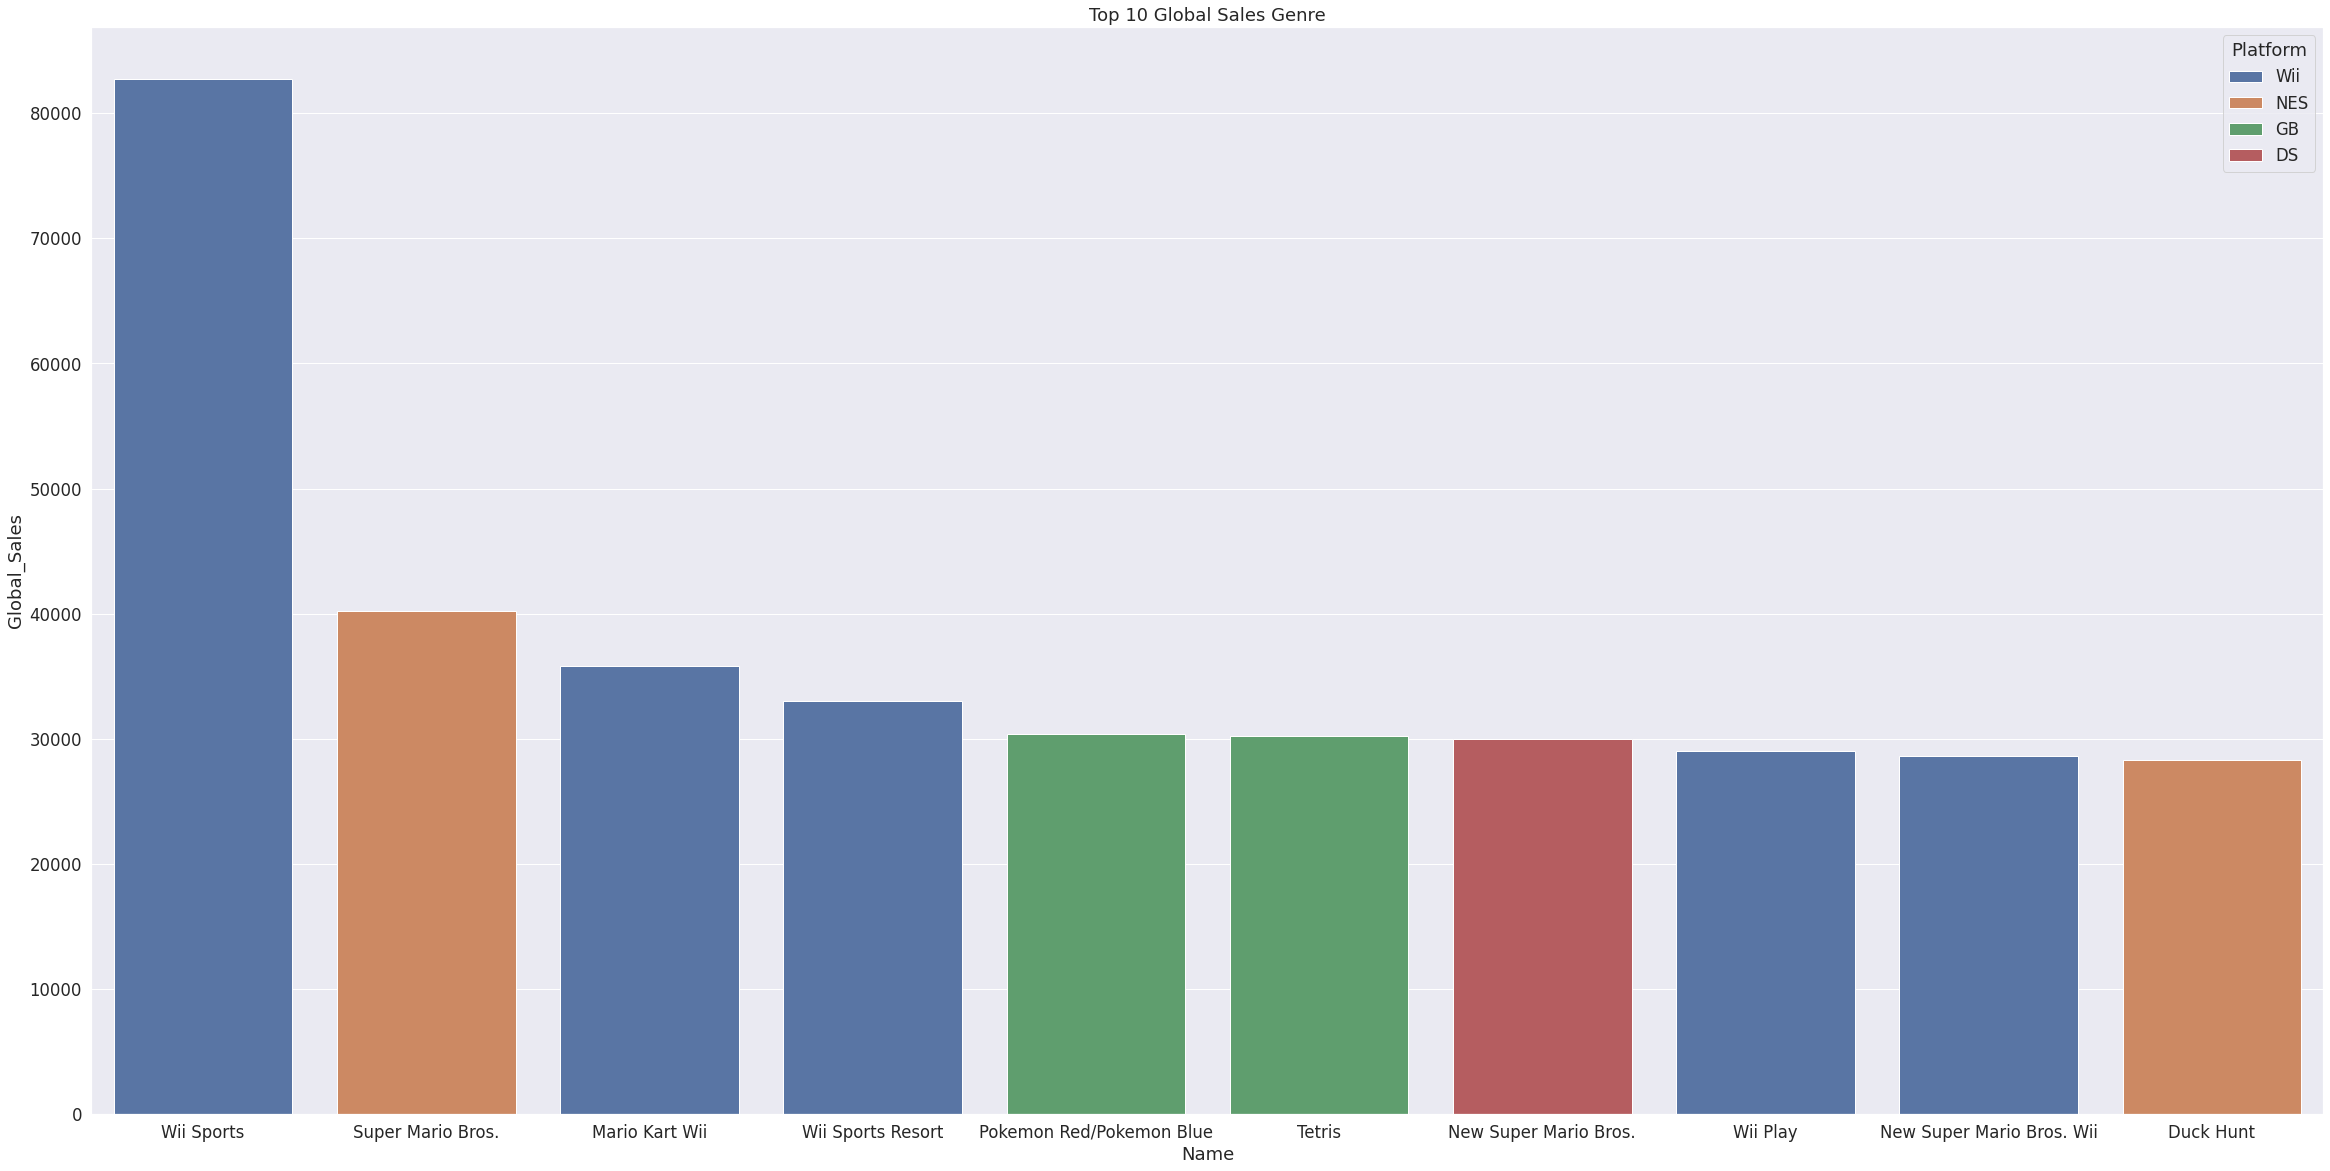

In [127]:
plt.figure(figsize=(40, 20))
sns.set(font_scale = 1.5)
sns.barplot(data = top10_global_sales, x="Name", y="Global_Sales", hue="Platform", dodge=False)

plt.title("Top 10 Global Sales Genre")
plt.show()

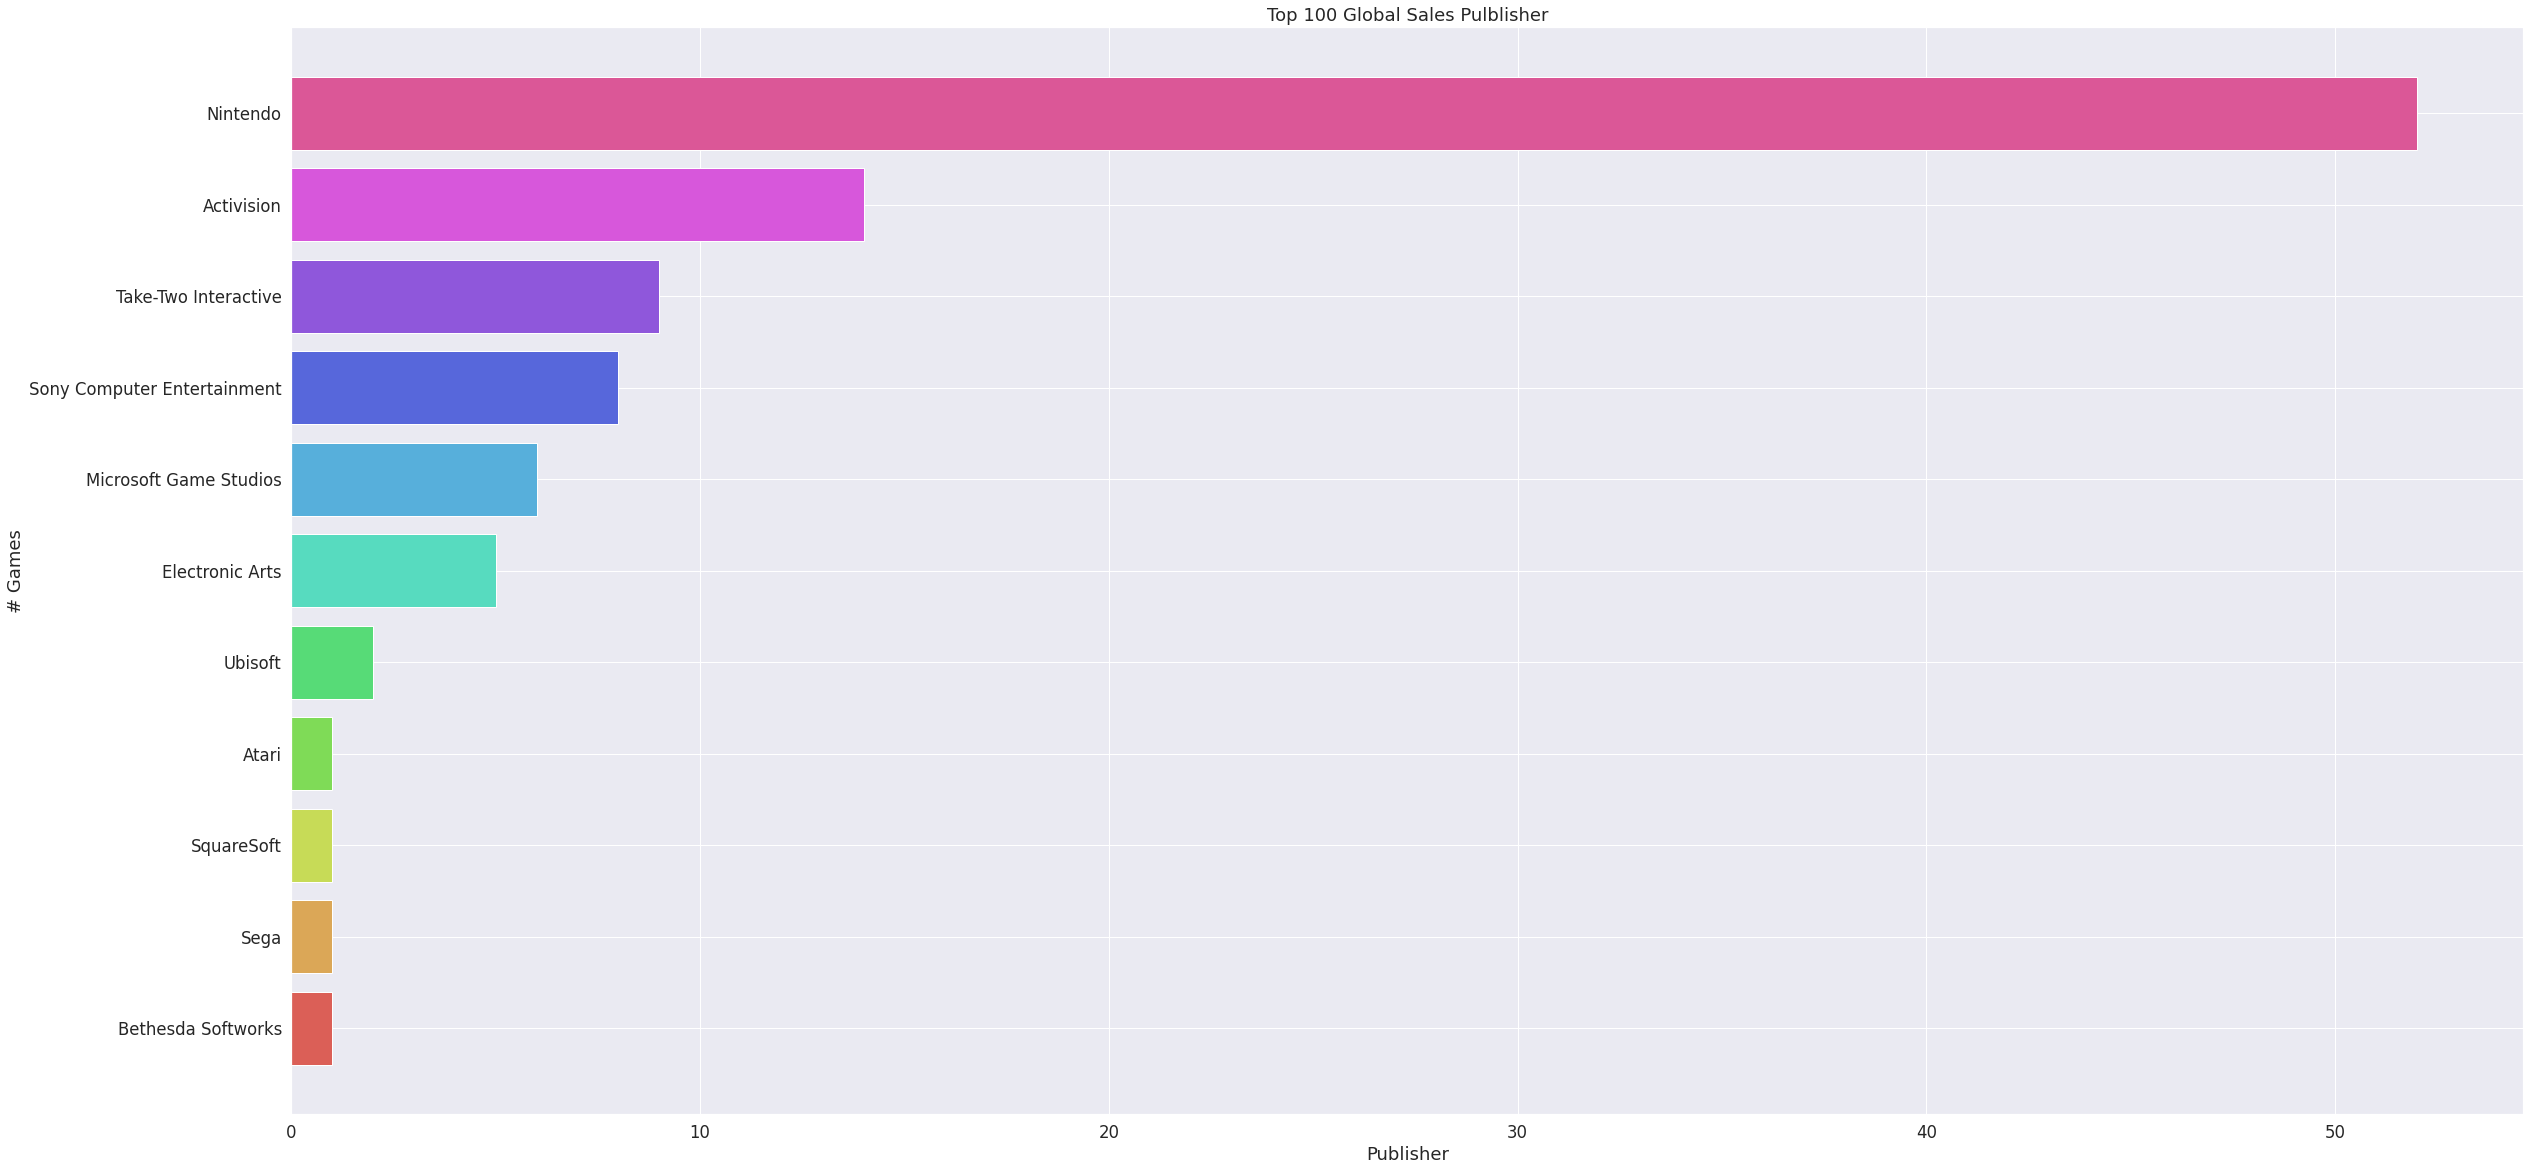

In [128]:
plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_global_sales_publisher = dict(sorted(Counter(top100_global_sales.Publisher).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_global_sales_publisher))
plt.barh(list(top100_global_sales_publisher.keys()), top100_global_sales_publisher.values(), color=colors)
plt.title("Top 100 Global Sales Pulblisher")
plt.xlabel("Publisher")
plt.ylabel("# Games")
plt.show()

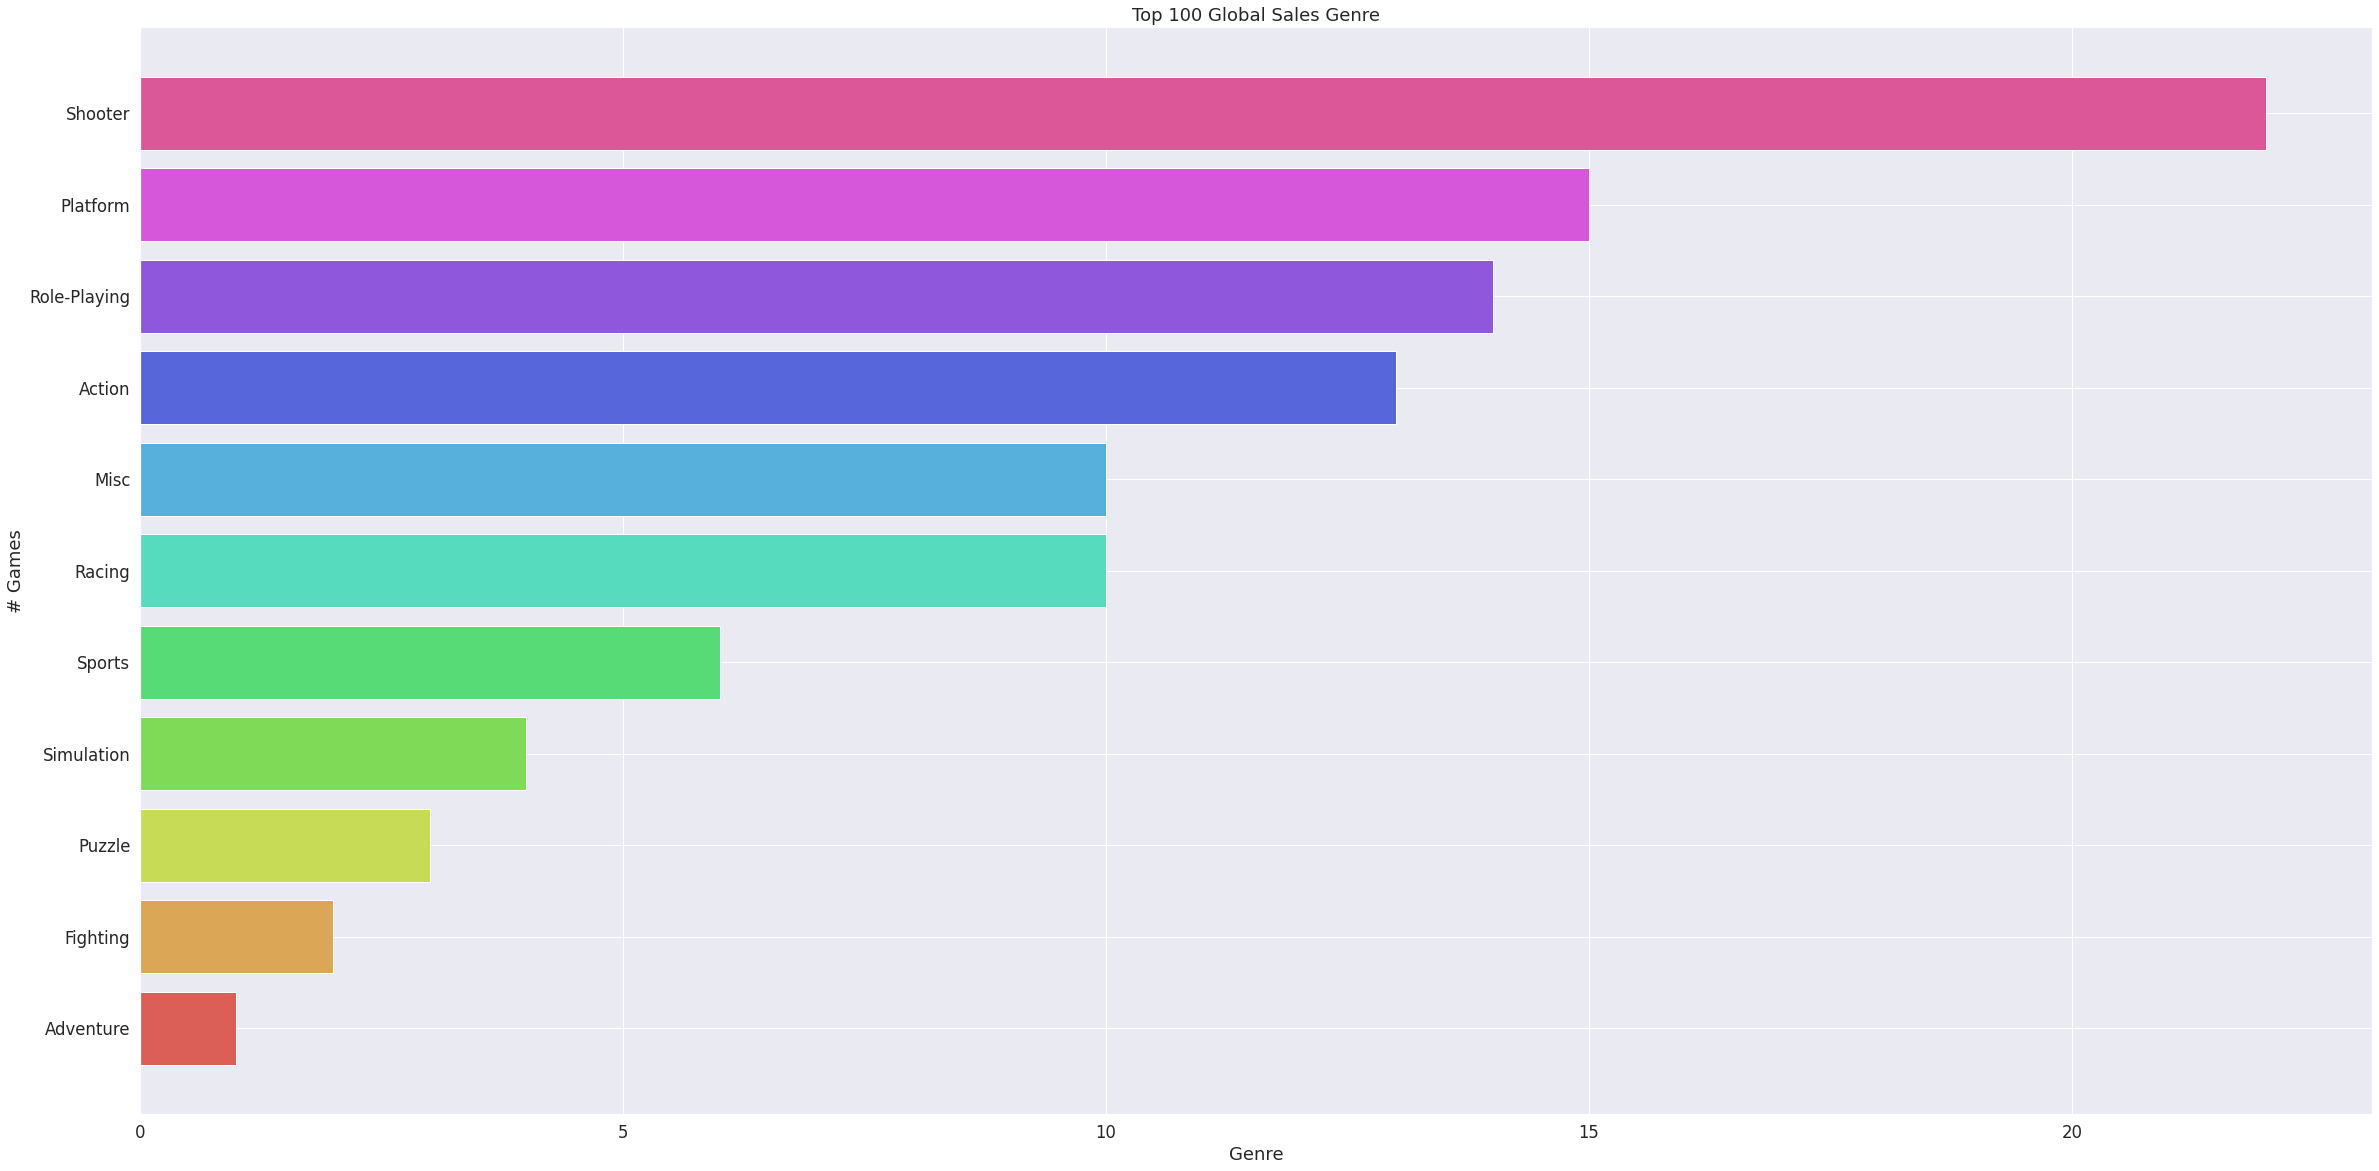

In [129]:
plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_global_sales_genre = dict(sorted(Counter(top100_global_sales.Genre).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_global_sales_genre))
plt.barh(list(top100_global_sales_genre.keys()), top100_global_sales_genre.values(), color=colors)
plt.title("Top 100 Global Sales Genre")
plt.xlabel("Genre")
plt.ylabel("# Games")
plt.show()

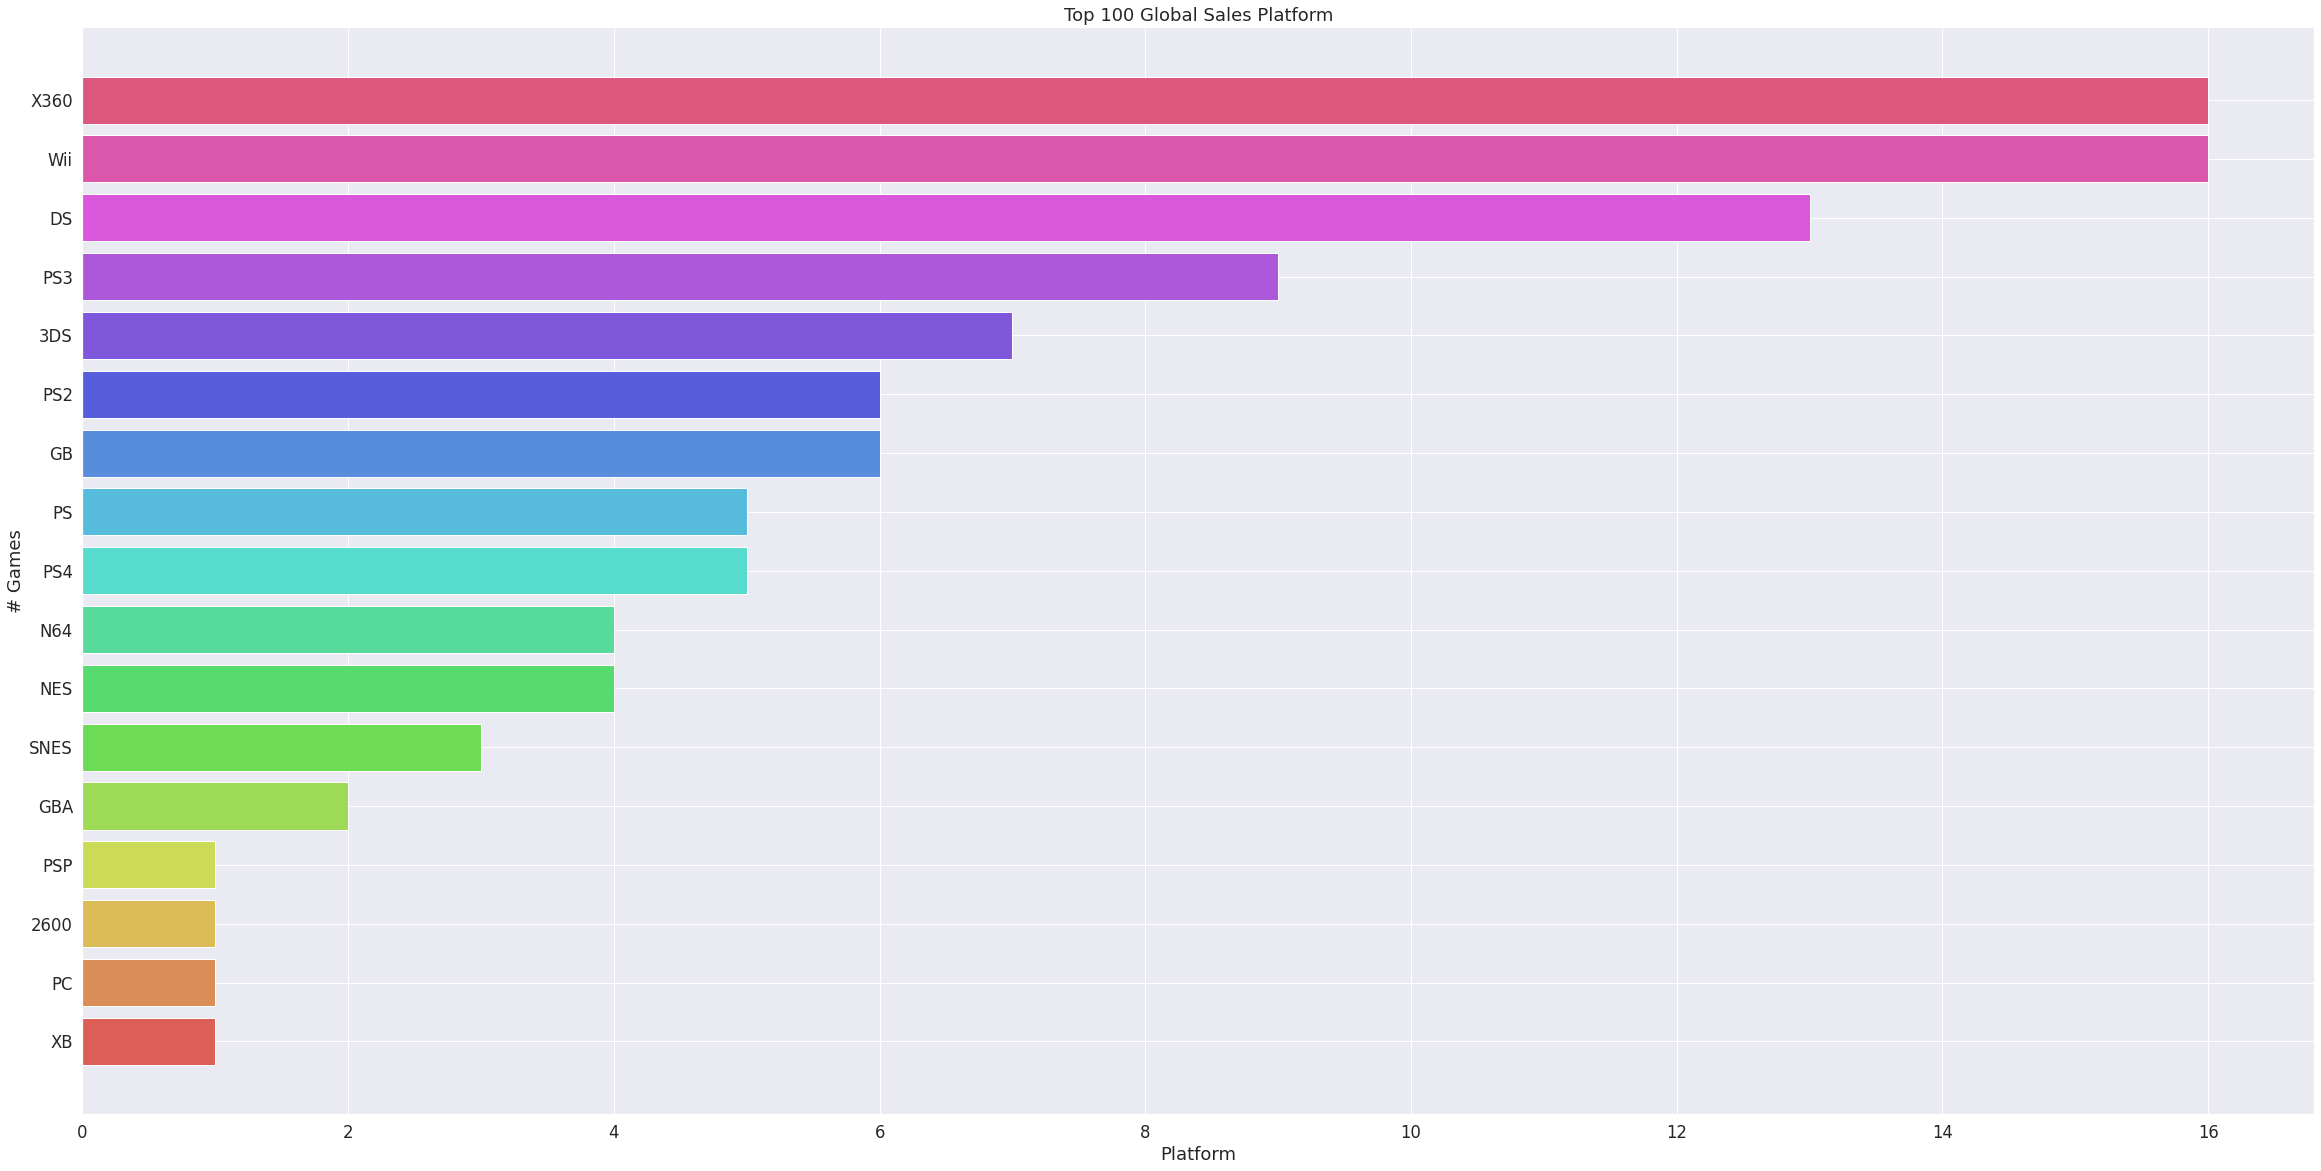

In [130]:
plt.rc('font', size=20)
plt.figure(figsize=(40, 20))

top100_global_sales_platform = dict(sorted(Counter(top100_global_sales.Platform).items(),key= lambda x:x[1]))
colors = sns.color_palette('hls',len(top100_global_sales_platform))
plt.barh(list(top100_global_sales_platform.keys()), top100_global_sales_platform.values(), color=colors)
plt.title("Top 100 Global Sales Platform")
plt.xlabel("Platform")
plt.ylabel("# Games")
plt.show()

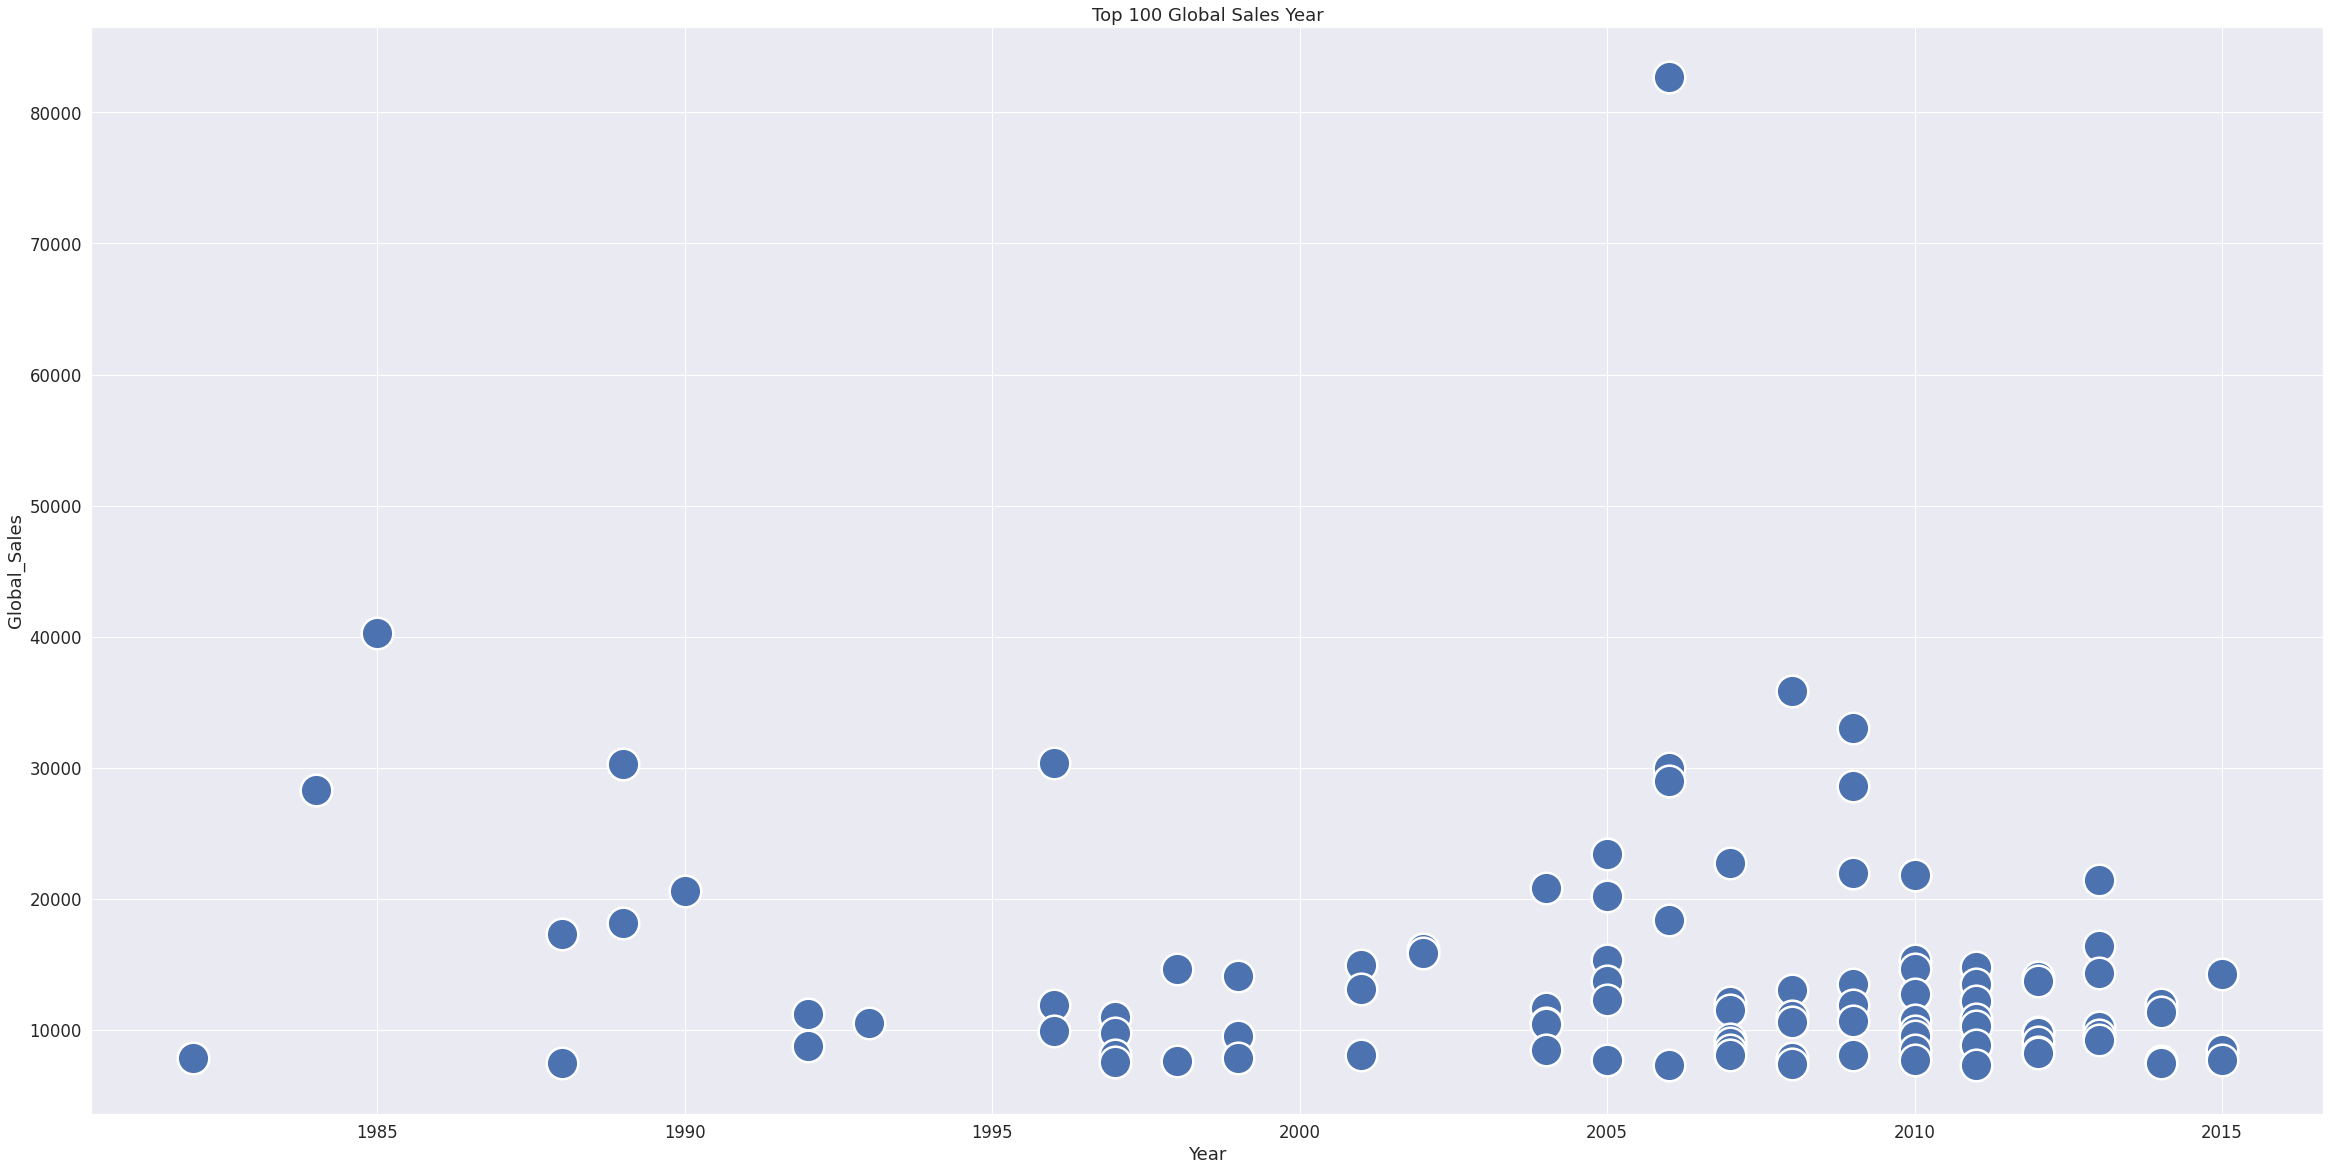

In [131]:
plt.figure(figsize=(40, 20))
plt.title("Top 100 Global Sales Year")
sns.scatterplot(data = top100_global_sales, x="Year", y = "Global_Sales", s=1000)